<a href="https://colab.research.google.com/github/nandovbr/calculate-a-daily-rate/blob/main/regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # para tabelas e importação dos arquivos
import plotly.express as px # lib para criação de gráficos dinâmicos
import seaborn as sns # lib para criar gráficos
import numpy as np # funções matemáticas de alto nível

In [ ]:
custo_diaria = pd.read_csv('custo_diaria.csv', sep=';') # variável com o conteúdo da tabela

In [ ]:
custo_diaria.head # visualizar a base de dados, aqui nesse caso a tabela "bagunçado"

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             3           200
2             4           650
3             6           499
4             7           549
5            10           980
6            12           700
7            13           735
8            15           859
9            16           900
10           20          1100
11           18           989
12           22          1075
13           23          1378
14           25          1500
15           27          1755
16           30          1850
17           32          2500
18           33          2000
19           40          1900
20           42          2089
21           43          2500
22           45          2250
23           47          2488
24           50          2680
25           51          2803
26           52          2890
27           53          3040
28           58          3150
29           60          3300>

In [ ]:
print(custo_diaria.head(40)) # visualizar a base de dados, aqui nesse caso a tabela melhor organizado
# adicionei head(40) já sabendo a quantidade de linhas para poder deixar as informações melhor organizadas

    qtd_pessoas  valor_diaria
0             1           150
1             3           200
2             4           650
3             6           499
4             7           549
5            10           980
6            12           700
7            13           735
8            15           859
9            16           900
10           20          1100
11           18           989
12           22          1075
13           23          1378
14           25          1500
15           27          1755
16           30          1850
17           32          2500
18           33          2000
19           40          1900
20           42          2089
21           43          2500
22           45          2250
23           47          2488
24           50          2680
25           51          2803
26           52          2890
27           53          3040
28           58          3150
29           60          3300


In [ ]:
custo_diaria.describe() # algumas estatisticas da tabela de dados

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [ ]:
# criando a variável independente
x_custo_diaria = custo_diaria.iloc[:,0].values # buscando todos os registros da 1ª coluna e converte para array
# iloc permite selecionar um conjunto de registros. ":" significa selecionar todos os registros. "0" é referência da primeira coluna
x_custo_diaria

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
# criando a variável dependente (a que será predizida)
y_custo_diaria = custo_diaria.iloc[:,1].values # ":" referencia todos os registros, "1" referencia a segunda coluna
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
np.corrcoef(x_custo_diaria, y_custo_diaria) # matriz. Correlação entre as colunas

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

**Correlação positiva nesse caso. Ela será positiva sempre que as variáveis crescem ou decrescem juntas, ou seja, possuema uma relação direta.**

**Correlação negativa ocorre quando uma variável cresce e a outra decresce. Uma oposta á outra.**

**Não ter correlação ocorre quando o crescimento ou decrescimento da uma variável não tem efeito sobre a outra.**

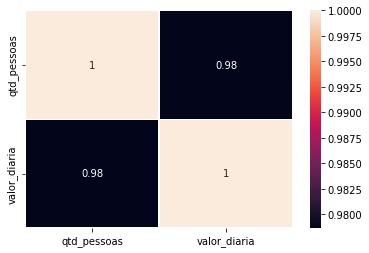

In [ ]:
correlation = custo_diaria.corr() # pega a correlação das variáveis
plot = sns.heatmap(correlation, annot = True, linewidths=.3) # anot mostrar os valores, linewidths é o tamanho á ser printado
plot

***Tratamento dos dados para o modelo***

In [ ]:
# visualizar o formato da variável em quantidade de linhas
x_custo_diaria.shape

(30,)

In [ ]:
x_custo_diaria
#visualizando a variável, temos um array com uma coluna/dimensão, mas precisamos ter uma matriz com 2 colunas

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
x_custo_diaria = x_custo_diaria.reshape(-1,1) #transforma a array em matriz
x_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [ ]:
x_custo_diaria.shape
#agora temos uma matriz com 2 colunas

(30, 1)

***Aplicação dos dados ao algoritmo de machine learning de regressão***

In [ ]:
from sklearn.linear_model import LinearRegression
# cria um objetito do tipo regressão linear e salva na variável
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria) # mostra que essa variável pertence a esse modelo específico

sklearn.linear_model._base.LinearRegression

Realizando o treinamento do modelo

In [ ]:
previsao_custo_diaria.fit(x_custo_diaria, y_custo_diaria)

LinearRegression()

In [ ]:
# verificar a interception
previsao_custo_diaria.intercept_

186.00229281307384

In [ ]:
# verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([51.14094547])

In [ ]:
# estimar/prever o custo do imóvel alugado baseado nos valores de número de pessoas
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria)

In [ ]:
# visualiza as previsões para cada número de pessoas
previsao_precos

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

***Visualizar no gráfico as disposições dos dados***

In [ ]:
x_custo_diaria # verificar o tipo da variável, que ainda é uma matriz

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [ ]:
x_custo_diaria.ravel() # transformar em um vetor/array

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
y_custo_diaria # verificar o tipo da variável, que ainda é um array/vetor

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
# coloca a variavel x_custo_diaria no eixo x e y_custo_diaria no eixo y do gráfico
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [ ]:
# coloca a variavel x_custo_diaria no eixo x e y_custo_diaria no eixo y do gráfico
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
# adiciona a linha de projeção no gráfico. 'name' é a legenda da linha
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_precos, name= 'previsões')

grafico.show()

In [ ]:
# verificar os valores de uma determinada previsão baseada na quantidade de pessoas
qtd_pessoas = 17
# o intercept + o coeficiente * a quantidade de pessoas
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([1055.39836585])

In [ ]:
qtd_pessoas = 25

previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([1464.52592963])

In [ ]:
# forma direta de verificar o valor para 8 pessoas
previsao_custo_diaria.predict([[25]])

array([1464.52592963])

In [ ]:
# indicar a qualidade do algoritmo (Quanto mais próximo do 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)
# no caso o algoritmo tem 95% de acerto

0.9577871649322629

In [ ]:
# visualizar os erros do modelo e armazenar na variável MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos) # é o valor real

In [ ]:
MSE

36867.67840031127

In [ ]:
# calcular o erro absoluto MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

138.91296481574125

In [ ]:
# calculo do RMSE
np.sqrt(MSE)

192.0095789285297

In [ ]:
np.std(y_custo_diaria) # desvio padrão

934.5458962631114

In [ ]:
np.mean(x_custo_diaria) # cálculo da média da coluna de quantidade de pessoas

28.6